# Library Imports

In [1]:
import pandas as pd

# Read user csv 

In [2]:
user_path = "./data/user.csv"

In [3]:
user_df = pd.read_csv(user_path)
user_df.head()

id     name  age     sex
0   1   julien   24    male
1   2     loic   24    male
2   3    robin   28    male
3   4    clara   38  female
4   5  jenyfer   46  female

# Read user informations csv

In [4]:
user_informations_path = "./data/user_informations.csv"

In [6]:
user_informations_df = pd.read_csv(user_informations_path)
user_informations_df.head()

id             job         city date_of_birth
0   1             ops        paris    1995-07-05
1   2   data engineer        paris    1995-05-02
2   3  data scientist        paris    1991-08-02
3   4              ux  montpellier    1981-01-02
4   5         manager        paris    1973-06-02

# Merge user with their informations

In [7]:
user_data_df = user_df.merge(user_informations_df, how="inner",on="id")
user_data_df.head()

id     name  age     sex             job         city date_of_birth
0   1   julien   24    male             ops        paris    1995-07-05
1   2     loic   24    male   data engineer        paris    1995-05-02
2   3    robin   28    male  data scientist        paris    1991-08-02
3   4    clara   38  female              ux  montpellier    1981-01-02
4   5  jenyfer   46  female         manager        paris    1973-06-02

# Apply a sort function on name

In [8]:
user_data_df = user_data_df.sort_values(by="name")
user_data_df.head()

id     name  age     sex             job         city date_of_birth
3   4    clara   38  female              ux  montpellier    1981-01-02
4   5  jenyfer   46  female         manager        paris    1973-06-02
0   1   julien   24    male             ops        paris    1995-07-05
1   2     loic   24    male   data engineer        paris    1995-05-02
2   3    robin   28    male  data scientist        paris    1991-08-02

# Filter user by sex

In [9]:
filter_by_sex = user_data_df["sex"]=="female"

In [10]:
female_user = user_data_df[filter_by_sex]
female_user.head()

id     name  age     sex      job         city date_of_birth
3   4    clara   38  female       ux  montpellier    1981-01-02
4   5  jenyfer   46  female  manager        paris    1973-06-02
5   6   solene   21  female      dev         nice    1998-03-02

In [11]:
male_user = user_data_df[~filter_by_sex]
male_user.head()

id    name  age   sex             job   city date_of_birth
0   1  julien   24  male             ops  paris    1995-07-05
1   2    loic   24  male   data engineer  paris    1995-05-02
2   3   robin   28  male  data scientist  paris    1991-08-02

# Dataframe informations

In [12]:
user_data_df.describe()

id        age
count  6.000000   6.000000
mean   3.500000  30.166667
std    1.870829   9.765586
min    1.000000  21.000000
25%    2.250000  24.000000
50%    3.500000  26.000000
75%    4.750000  35.500000
max    6.000000  46.000000

In [13]:
(row, col) = user_data_df.shape
print(row, col)

6 7


In [15]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 3 to 5
Data columns (total 7 columns):
id               6 non-null int64
name             6 non-null object
age              6 non-null int64
sex              6 non-null object
job              6 non-null object
city             6 non-null object
date_of_birth    6 non-null object
dtypes: int64(2), object(5)
memory usage: 384.0+ bytes


# String date to date object

In [16]:
user_data_df["date_of_birth"] = pd.to_datetime(user_data_df["date_of_birth"])

In [17]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 3 to 5
Data columns (total 7 columns):
id               6 non-null int64
name             6 non-null object
age              6 non-null int64
sex              6 non-null object
job              6 non-null object
city             6 non-null object
date_of_birth    6 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 384.0+ bytes


# Filter user  borned between dates

In [19]:
start_date = "1970"
end_date = "1975"
filter_on_date_birth = (user_data_df["date_of_birth"] > start_date) & (user_data_df["date_of_birth"]<end_date)

In [20]:
user_data_df[filter_on_date_birth]

id     name  age     sex      job   city date_of_birth
4   5  jenyfer   46  female  manager  paris    1973-06-02

# Plot sex repartitions

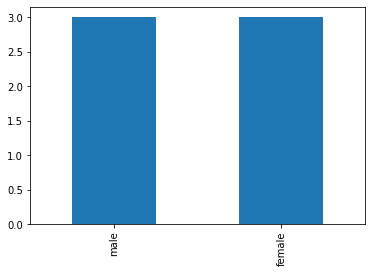

In [22]:
pd.value_counts(user_data_df['sex']).plot.bar()